In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cf, cartopy.crs as ccrs
from metpy import units
import metpy.calc as mpcalc

In [2]:
df=pd.read_csv('irma_best_track.txt', delimiter=',')

In [3]:
df

,Date,Time,_,Cat,Lat,Lon,WSPD,PRESS,x,x.1,...,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,x.11,x.12
0,20170830,0,,TD,16.1N,26.9W,30,1008,0,0,...,0,0,0,0,0,0,0,0,0,-999
1,20170830,600,,TS,16.2N,28.3W,35,1007,30,0,...,0,0,0,0,0,0,0,0,0,-999
2,20170830,1200,,TS,16.3N,29.7W,45,1006,30,0,...,30,0,0,0,0,0,0,0,0,-999
3,20170830,1800,,TS,16.3N,30.8W,50,1004,30,30,...,30,10,0,0,0,0,0,0,0,-999
4,20170831,0,,TS,16.3N,31.7W,55,999,40,40,...,40,20,20,0,0,0,0,0,0,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,20170912,1200,,LO,33.8N,86.9W,20,1000,0,0,...,0,0,0,0,0,0,0,0,0,-999
62,20170912,1800,,LO,34.8N,88.1W,15,1003,0,0,...,0,0,0,0,0,0,0,0,0,-999
63,20170913,0,,LO,35.6N,88.9W,15,1004,0,0,...,0,0,0,0,0,0,0,0,0,-999
64,20170913,600,,LO,36.2N,89.5W,15,1004,0,0,...,0,0,0,0,0,0,0,0,0,-999


In [4]:
lat=df['Lat']
lon=df['Lon']

In [5]:
type(lat[0])

str

In [6]:
fix=lat.str.rstrip('N')
lat=fix
lat=lat.astype('float32')
fix=lon.str.rstrip('W')
lon=fix
lon=lon.astype('float32')
lon=lon*-1

In [7]:
lat

0     16.100000
1     16.200001
2     16.299999
3     16.299999
4     16.299999
        ...    
61    33.799999
62    34.799999
63    35.599998
64    36.200001
65    36.799999
Name: Lat, Length: 66, dtype: float32

In [8]:
lon

0    -26.900000
1    -28.299999
2    -29.700001
3    -30.799999
4    -31.700001
        ...    
61   -86.900002
62   -88.099998
63   -88.900002
64   -89.500000
65   -90.099998
Name: Lon, Length: 66, dtype: float32

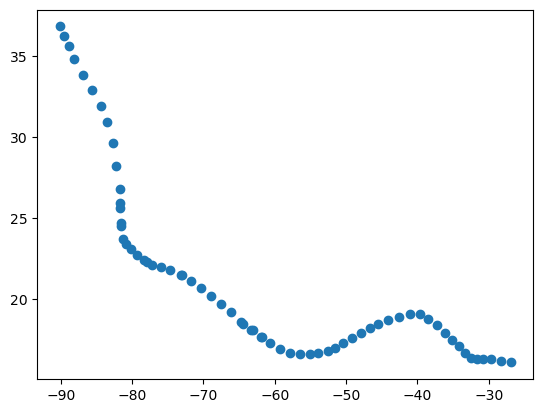

In [9]:
plt.scatter(lon,lat)

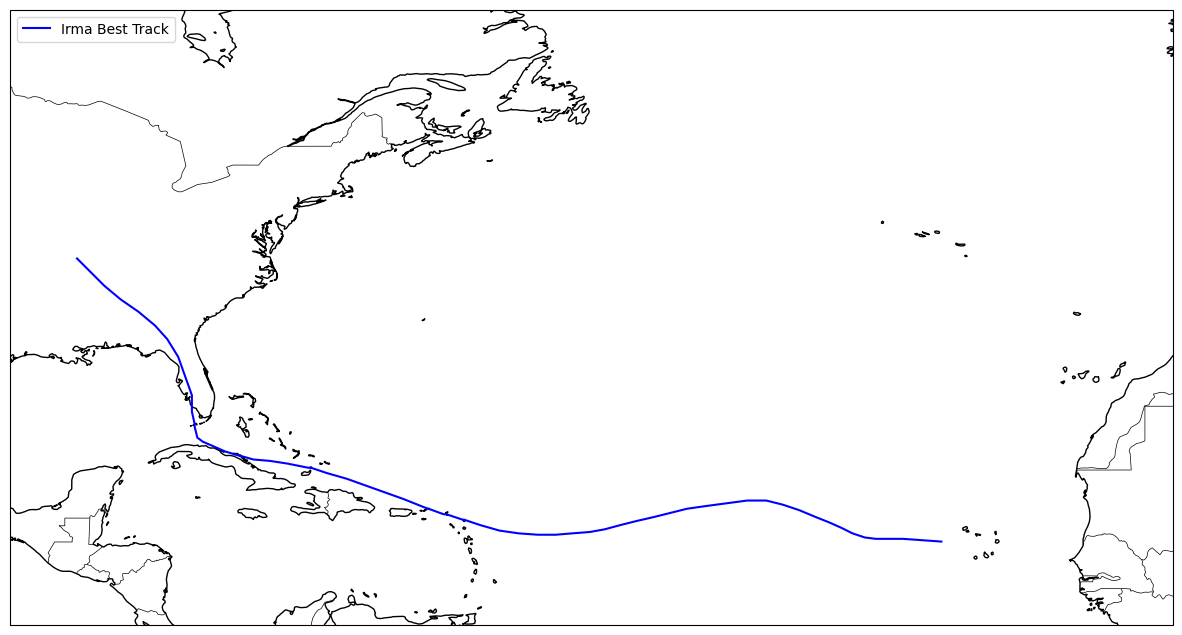

In [19]:
grid = ccrs.PlateCarree()
lonW = -95
lonE = -10
latS = 10
latN = 55
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res='50m'

fig = plt.figure(figsize=(15, 20))
ax = plt.subplot(1, 1, 1, projection=grid)
ax.set_extent([lonW, lonE, latS, latN], crs=grid)
ax.coastlines(resolution=res, color='black')
ax.add_feature(cf.BORDERS, linewidth=0.5, edgecolor='black')
ax.plot(lon,lat,color='blue',label='Irma Best Track')
ax.legend(loc='upper left')

In [23]:
wspd=df['WSPD'].astype('float32')
pres=df['PRESS'].astype('float32')

In [24]:
wspd

0     30.0
1     35.0
2     45.0
3     50.0
4     55.0
      ... 
61    20.0
62    15.0
63    15.0
64    15.0
65    15.0
Name: WSPD, Length: 66, dtype: float32

In [25]:
pres

0     1008.0
1     1007.0
2     1006.0
3     1004.0
4      999.0
       ...  
61    1000.0
62    1003.0
63    1004.0
64    1004.0
65    1005.0
Name: PRESS, Length: 66, dtype: float32

In [40]:
import tropycal.tracks as tracks
import datetime as dt

In [42]:
basin = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)
basin.to_dataframe()
storm = basin.get_storm(('irma',2017))

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (1.73 seconds)


In [43]:
storm

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      155 knots
    Minimum Pressure:  914 hPa
    Start Time:        0000 UTC 30 August 2017
    End Time:          0000 UTC 12 September 2017

Variables:
    time        (datetime) [2017-08-30 00:00:00 .... 2017-09-13 12:00:00]
    extra_obs   (int64) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [TD .... LO]
    lat         (float64) [16.1 .... 36.8]
    lon         (float64) [-26.9 .... -90.1]
    vmax        (int64) [30 .... 15]
    mslp        (int64) [1008 .... 1005]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL112017
    operational_id:  AL112017
    name:            IRMA
    year:            2017
    season:          2017
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             64.9
    realtime:        False
    invest:          False
    subset:          False

<GeoAxes: title={'left': 'Hurricane IRMA', 'right': '30 Aug 2017 – 12 Sep 2017\n155 kt • 914 hPa • 64.9 ACE'}>

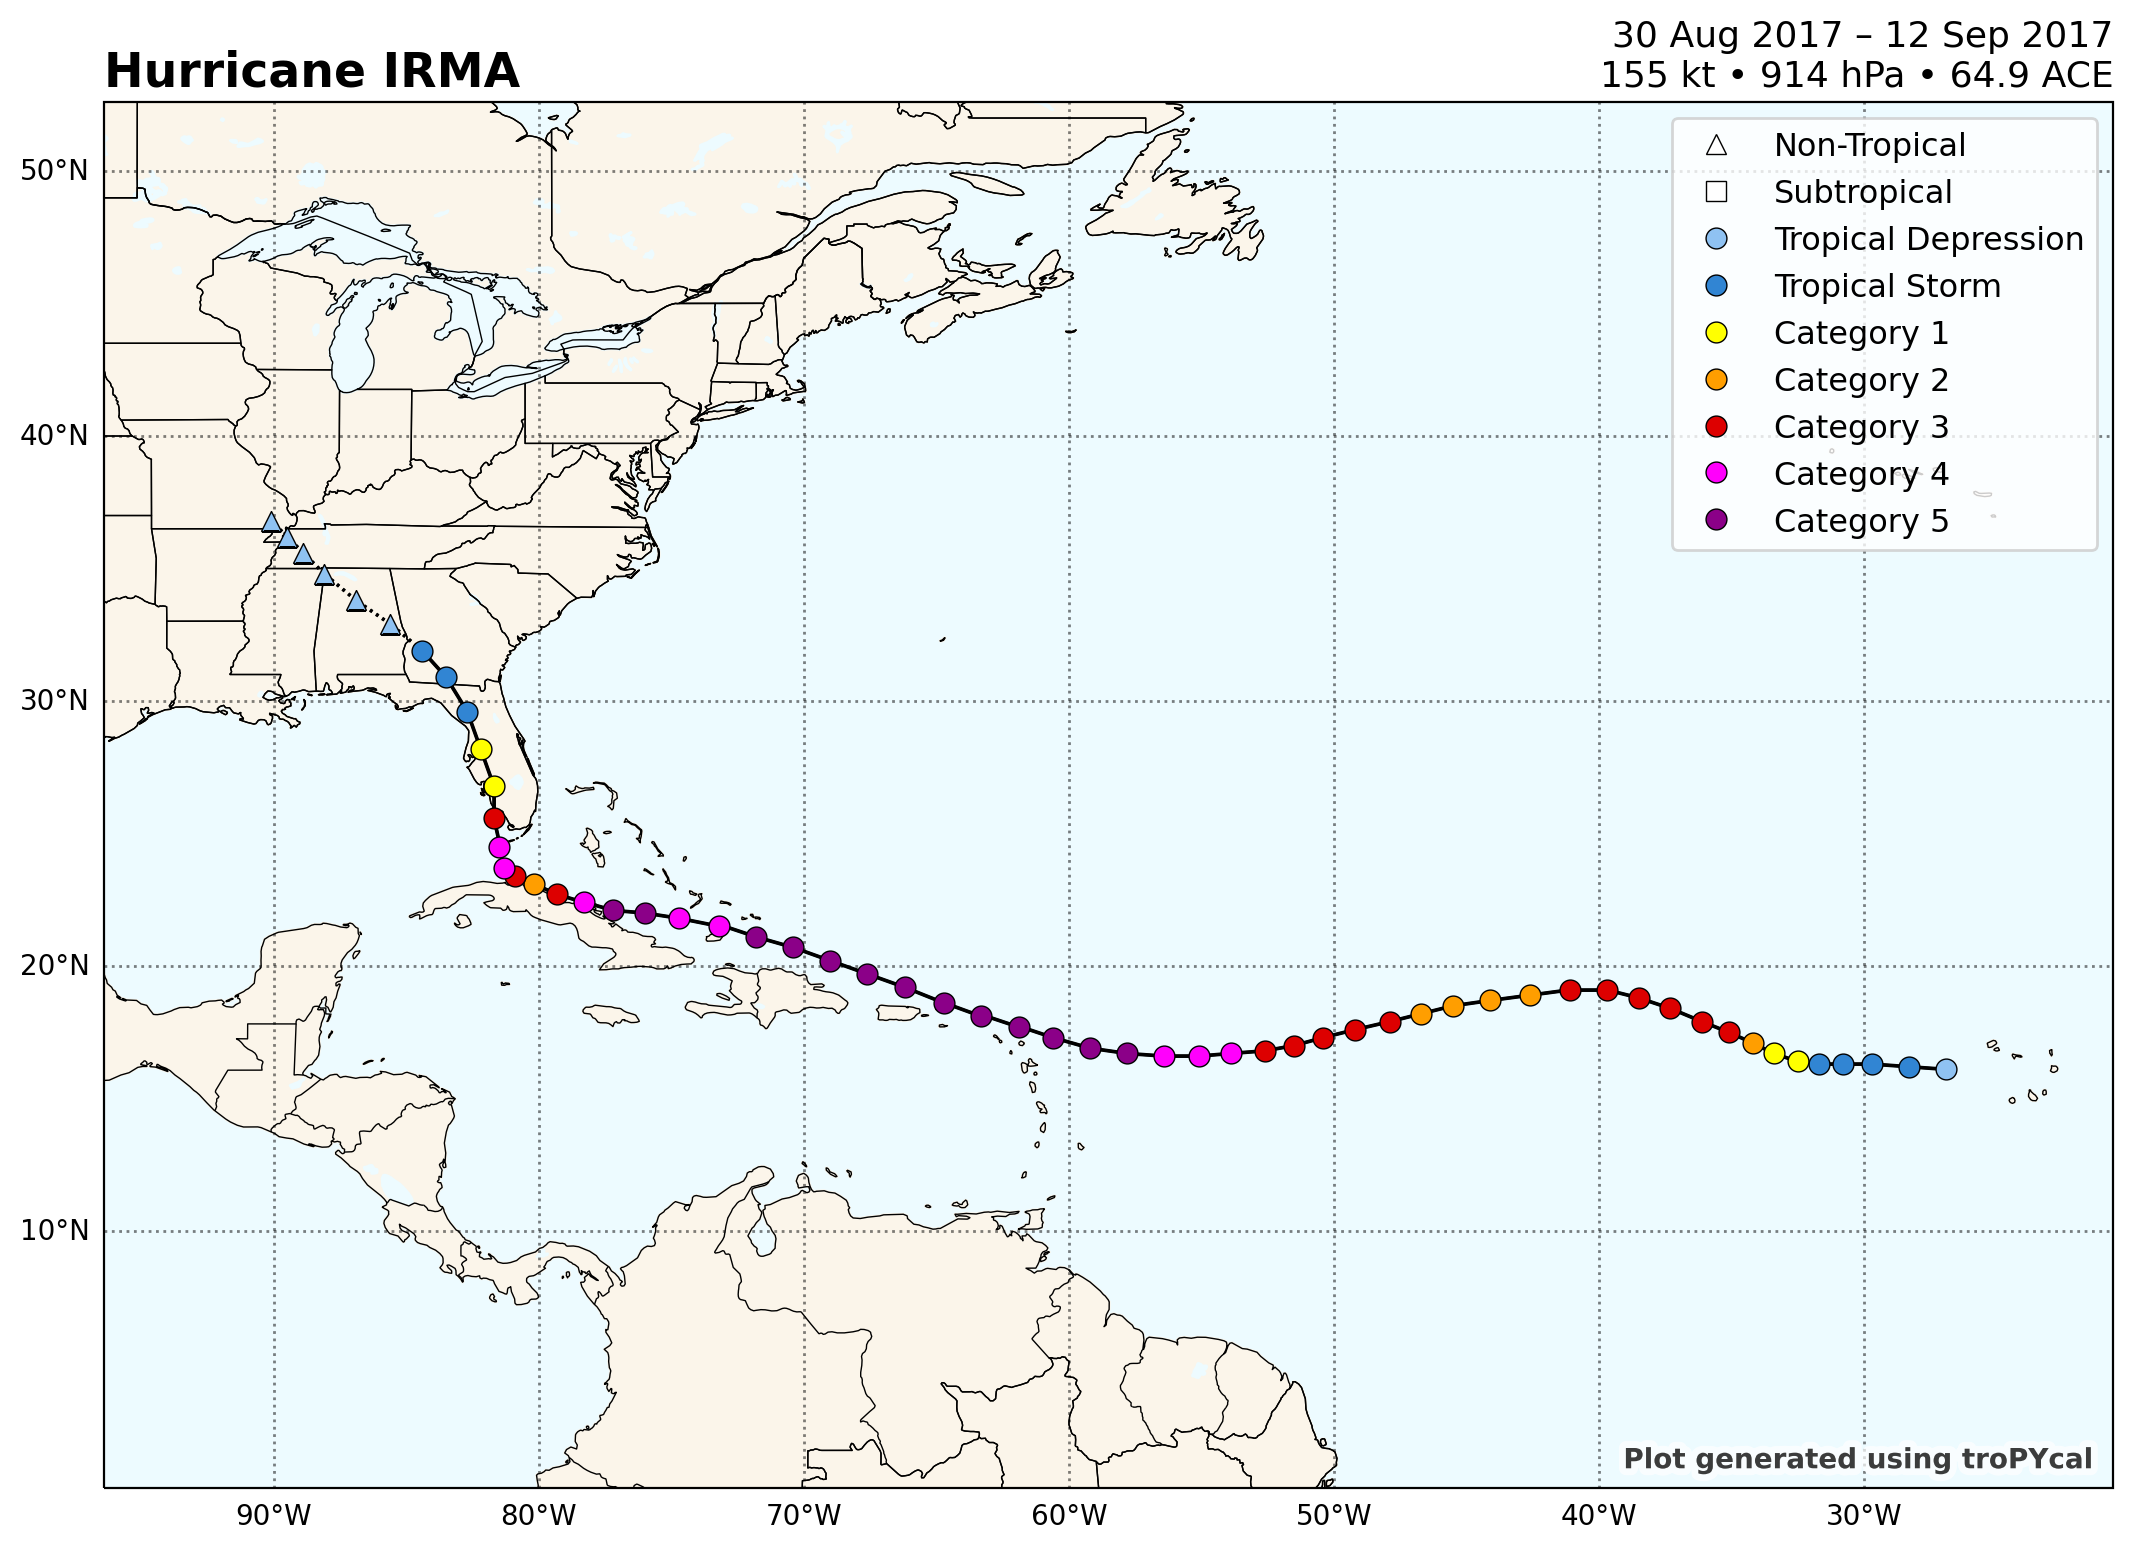

In [55]:
basin.plot_storm(('irma',2017))

In [53]:
import tropycal.tornado as tornado

In [54]:
tor_data = tornado.TornadoDataset()

#tor_ax,domain,leg_tor = tor_data.plot_tors(dt.datetime(2011,4,27),plotPPH=True,return_ax=True)
#tor_ax

--> Starting to read in tornado track data


TypeError: read_csv() got an unexpected keyword argument 'error_bad_lines'